# **Deploy End-to-End Machine Learning Pipelines**

## **Machine Learning Operations (MLOps) and Pipelines**

### **Machine Learning Operations (MLOps) Overview**

![](2023-12-31-20-21-31.png)

![](2023-12-31-20-22-46.png)

It's important to consider that the machine learning development life cycle is very different than the software development life cycle for a variety of reasons. But I'll touch on a few here. First, the model development life cycle is difficult to plan for from a project management perspective. It typically includes longer experimentation cycles than you would see in a standard agile software development process. Also the development of machine learning models includes data tasks like feature engineering and data preparation. You also have data processing code, as well as new inputs and artifacts to consider for versioning. You also have additional pipeline task as well. When you start to look at automating the machine learning workflow, the inputs and artifacts that are generated across these tasks result in multiple disparate pipelines with dependencies that can be a bit more challenging, stitched together than a typical software development workflow. Second, some models exist by themselves where you might be manually reading prediction requests and getting responses through a batch process or even within your notebook on an ad hoc basis. This is especially true in research environments. However, in many cases, a model is typically a small part of an overall solution that incorporates machine-learning. While that model is still a very key component to that solution, most often there is a need for other components that need to be built or integrated. As an example, consider your product review use case and your model that is predicting the classes of sentiment for a product review. That model itself will be able to classify the sentiment related to a product, but you also need to consider how that prediction will actually be used and potentially integrated into other existing applications. For this, there may be additional tasks like creating a rest API as a common interface for other applications to integrate with your model or even building applications that can respond to those reviews. This could mean creating automation to initiate back-end processes that allow for customer support engineers to quickly react and respond to any negative reviews. This brings me to the third consideration where typically multiple personas span the machine learning development lifecycle, and all are really needed to ultimately be able to build, deploy, integrate, and operate a machine learning workload. This can create challenges as these personas often have competing priorities and needs. There may also be skill gaps in building an operating machine learning workloads. As an example, a data scientist may not have a traditional IT background. While they may be very comfortable in creating a model that meets the performance objectives that have been identified for your particular machine learning use case, they may not know how to host that model in a way that it can be consumed by other applications or other systems. In this case, there may be a need to have a deployment engineer that is also engaged to help in building out the infrastructure and the resources that are needed to operate and host that model. Also, I mentioned that you might need to integrate that hosted model with another application. In this case, you're likely to depend on a software engineer to perform that integration. If there isn't a cross-functional team with the same project goals in place, competing priorities and skill gaps across these personas make it really difficult to provide that path to production for your model. Finally, many teams have processes in place supporting different regulatory or even internal corporate requirements. This means that when you're creating your machine learning pipeline, sometimes you also need to be able to ensure that traditional practices can be included inside the steps of your pipeline. Something like change management as an example here. This may mean that within your pipeline, you're going to automatically open a change ticket anytime a new model gets deployed to production. Or maybe it's a manual approval that's required before your model can deploy to production. All of these processes may need to be incorporated inside your machine learning pipeline. As you can see, these considerations span, people process, and technology.

![](2023-12-31-20-29-59.png)

![](2023-12-31-20-32-18.png)

![](2023-12-31-20-36-56.png)

![](2023-12-31-20-39-19.png)

![](2023-12-31-20-42-44.png)

![](2023-12-31-20-45-40.png)

![](2023-12-31-20-50-38.png)

![](2023-12-31-20-51-27.png)

![](2023-12-31-20-55-50.png)

Considering and understanding all of these different aspects are key in ensuring you're able to provide a path to production of your model. Let's take a look, again, at a typical machine learning workflow. I just covered the considerations for providing a path to production for your machine learning workloads and some of the common challenges that teams run into. MLOps aims to provide that path to production by reducing manual hand-offs between the steps in your workflow, increasing automation within those steps in your workflow, and then going a step further to orchestrate the steps across your workflow. But you don't want to just apply automation, you also want to improve the quality of your models. To do that, you need to establish mechanisms and quality gates inside your machine learning pipeline. Let's now take a look at typical workflow tasks without any MLOps practices applied. Here's an example of a workflow starting with data ingestion and analysis. Here, a data engineer may create a raw dataset and manually send it to a data scientist. Then a data scientist is typically going to iterate through their model-building activities. This includes performing feature engineering, and data transformations, as well as experimenting with multiple hyperparameters and algorithms across their different experiments as they run through their model training and tuning activities as well. They typically iterate through these activities until they have a candidate model that is performing well according to their evaluation metric. At that point, a data scientist may hand that model off to a deployment team or an ML engineer who's responsible for deploying that model. If there's been limited communication between these teams up until this point in time, I often see this part result in a lot of delays because that model is essentially a black box to that deployment engineer. This means there's very limited visibility into how that model was built, how you would consume that model, and then how you monitor that model. To add to that, traditional deployment teams may not have a lot of experience in deploying and operating machine learning workloads. Once the deployment engineer has deployed the model, a software engineer often needs to create or make changes to applications that are going to then use that model. Finally, someone ultimately needs to operate that model in production. This typically means ensuring the right level of monitoring is set up, which can be challenging as the team that's operating the model may not be familiar with machine learning workloads or how to monitor a model. This can also include things like identifying and setting up the model retraining strategy as well. As you can see here, having a disconnected workflow with multiple manual hand-offs and limited cross team collaboration could really slow down your ability to get a model to production quickly and the ability to continue to iterate on that model as needed. Let's now take a look at a view that incorporates cross team collaboration with automation to reduce those hand-offs and delays in a workflow. You can see in this view that you also incorporate a centralized Model Registry. I'm going to talk a lot more about Model Registry later in this week, but the Model Registry holds key metadata and information about how your model was built, how the model performed with evaluation metrics. It's no longer a manual hand-off of a black box model. A Model Registry can also be used to trigger downstream deployment workflows as well. Once that model has been registered and approved, it can then trigger that downstream automated pipeline to deploy your model. That deployment pipeline typically includes the steps that are needed to package your model and then deploy it to one or more environments. Depending on the use case, that deployment may require additional code or packaging for consumption. Often a software engineer will be needed here to provide the steps and the code that is needed to create or update the API that will then be used to create a RESTful interface or a commonly defined interface for integrating with other applications. Finally, for operating your model, the correct monitors need to be identified and put in place early through your cross-functional teams. These monitors include traditional systems or performance monitors, but they also include model specific monitors like checking for things like model quality drift or data drift. As you can see here, visibility into those monitors is provided back to the personas that are involved in creating that end-to-end workflow. This is because there are some aspects of that monitoring that different personas may need more visibility into. As an example here, some logs may be generated by model monitors that the data scientist or machine learning engineers want to have visibility into. In this case it's key to make sure that you're providing that back as a feedback mechanism and providing that transparency and visibility to those personas.

### **Creating Machine Learning Pipelines**

![](2023-12-31-21-08-17.png)

![](2023-12-31-21-10-11.png)

However in the case of a machine learning pipeline you have multiple potential triggers. Such as a change to algorithm, hyper parameters or code, or alternatively having new training data, which could also be another potential trigger for your machine learning pipeline. Another key goal in building out an effective pipeline is establishing traceability, so ideally you have a central view of how pipeline artifacts were built. This is important not only for visibility and support, but also in the event of needing to recover any resource or artifact that's part of your pipeline. Let's take a closer look at each of these tasks and the considerations for each. I'll start with your data task and specifically data ingestion for model development. I work with a lot of teams that start with the view on the left hand side, especially when getting started with machine learning. Where in this view you reach out to your data engineer, you ask them for some data, sometimes you need to go through a series of security approvals as well. And then ultimately get a data set that you can use for your model building activities. However there are challenges with this model as you can imagine. First, it can really slow down model development time. Second, it can also result in limited traceability with these manual handoffs of data. Third, it also makes model development difficult in terms of automating any kind of retraining workflows. While you may be able to do some of those initial model build activities, retraining pipelines in this particular context are very difficult to support. It's generally recommended to establish a data lake that provides governed access to data scientists or automated processes. This allows data scientists to quickly start a model development activities, and it also ensures there's traceability for that data because you know which data scientists have checked out specific data sets. This also allows you to create a model retraining workflow as well where the consumer in this particular case is the actual deployment pipeline or the machine learning pipeline, as opposed to the data scientist. After you get the data, a typical machine learning pipeline starts with the task that's needed to then take that raw data. And then transform it into a format that the algorithm can understand and that you can use for your model training or building activities. As we've discussed in the previous session's, your data pre-processing and feature engineering, can include any process or set of tasks. Whether it's a Python script or even another model that's being used to transform your data into the features, that will ultimately be used for training your model. When you automate your data processing and feature engineering, you have a key input and that's your raw data. And this typically gets fed in through automation, and then that automation will extract and transform those features, ultimately producing artifacts that will be used in training. The artifacts that are produced in your data preparation step include your training, validation, and test data sets. I talked before about traceability being a benefit of machine learning pipelines. Traceability is partially a result of the versioning of the inputs and the outputs for each workflow step. For your data task, you have code versioning for the code that you used to transform the data, but you also have data versioning.

![](2023-12-31-21-10-46.png)

![](2023-12-31-21-12-48.png)

![](2023-12-31-21-15-09.png)

![](2023-12-31-21-15-58.png)

So as you can see in this slide, an example here would be that maybe you have that raw data set on input that's version one, and then you perform some feature transformations to ultimately create your output artifacts. So those output artifacts in this case, have aversion associated with them as well. So in this case your training validation and test data sets are your artifacts and maybe be at version 13. And this could be because you've had multiple iterations of feature engineering and data transformations, until you got it into the format that you really want it to be. The key here is that all of your inputs and artifacts that are produced as part of an automated step, should have versions associated with them. Finally for your data task, there's a number of validation tests that could also be incorporated into your machine learning pipeline and automated to improve quality. A few examples here include data quality checks where you can implement automated steps that gather statistics about your input data to look for any signals of potential data quality issues. So things like a specific attribute having an unexpectedly large number of missing values on input. Another example here would be checking for indicators of statistical bias. Finally data schema is something that you can include in your automated checks as well. So in this case you can embed a quality check inside your pipeline that ensures that the data structure and schema that's coming in on input, is in the format is expected to be. The key here is not only performing these tasks but also automating them as part of your machine learning pipeline. So I just covered some of the data tasks that you need to consider automating as part of your machine learning pipeline. As well as some of the considerations like versioning and data validation that you can also incorporate in your machine learning pipelines. But let's now move on to the next task in a typical machine learning pipeline where you're going to be actually training your model. In your model building tasks, you can see here that the output of your previous task, then becomes the input into the next task. So in this case the output was your training validation and test data sets, which will be used in training and tuning your model as well as evaluating your model. The output includes a number of potential candidates until you find the best performing model according to your evaluation criteria. Although this is represented as a small box on the diagram, in reality model evaluation can take many forms. But it will typically include evaluation metrics such as training metrics and model validation metrics at a foundational level. For a model deployment task, you're taking that model artifact and you're deploying it for consumption. This can take two different forms, you can either deploy in batch mode where you're basically wanting to send in batch records for prediction, and then receive batch responses back. Or you can deploy your model for a real-time or persistent endpont.

![](2023-12-31-21-16-24.png)

An endpoint can consistently serve prediction requests and responses through a serving stack. And the serving stack typically includes a proxy, a web server, that can then accept and respond to your requests coming in on input. When you're setting up your model deployment task as part of your machine learning pipeline. It's important to understand how your model will be consumed when you're setting up that model deployment task as part of your pipeline. Because as you can see here, the surrounding resources that need to be built, will differ between these two different forms. Finally once you've deployed and likely integrated your model into a broader solution, you have your operating task to consider. The output of your previous set of tasks is a deployed model or models that are then available for consumption. Although operating tasks are at the end of our workflow here, when you're setting up your pipeline you really need to be considering your operating tasks early so that they can be incorporated into your workload early. As an example if there's runtime data that you need to capture, you need to ensure that the code is in place to capture and log that data. As an example here you could be capturing the request for predictions that come in, as well as the prediction responses that get returned. In this case for your product review use case, you may have a product review coming in that's entered through, say a web page and it ultimately gets classified as either negative, neutral or positive. You may want to capture that prediction request coming in, but you may also want to capture that prediction response going back out. And store it in a secondary data store to be able to perform additional reporting or analysis like determining whether a specific vendor supplying your product has potential quality issues. Also your operating tests include setting up monitors and alerts so that you can ensure that your deployed model has ongoing monitors that look for signs of things like model degradation. And also monitor the health of the systems that are supporting your model. So looking for common system metrics like CPU utilization or GPU utilization, that are supporting your machine learning model. One common challenge I run into is being able to have central visibility into your machine learning workflow, across all of the different personas and roles that are typically involved in an end to end machine learning workflow. This is a challenge whether it's having visibility into the status of your pipeline, so knowing when a specific version of a model is deployed to production. Or having visibility into system performance for debugging or even having visibility into model performance to see how your model is performing over time. In this case, dashboards can serve as a central feedback mechanism for your machine learning pipelines as well as your deployed models. So I've talked about the steps in creating your machine learning pipelines and the tests that can be automated within those steps, but how do you bring it all together into an end to m pipeline? This is where pipeline orchestration comes in because you need a way to not only automate the tasks within your steps, but you also need a way to coordinate those steps that are performed across your end to end workflow. There are a lot of great choices for pipeline orchestration but orchestration essentially allows you to manage the end to end traceability, of your pipeline. But focusing on using automation to capture the specific inputs and outputs of a given task, and the artifacts that are then produced by those tasks, and then bringing them all together in a controlled end to end pipeline.

![](2023-12-31-21-17-37.png)

![](2023-12-31-21-18-32.png)

![](2023-12-31-21-19-54.png)

### **Model Lineage & Artifact Tracking**

![](2023-12-31-21-21-57.png)

There are typically many inputs that go into training a specific version of a model. These inputs include things like the version of the data that was used to train the model in combination with the versions of the code and the hyperparameters that were used to build the model. However, inputs also includes things like the versions of the algorithms or the frameworks that were used. Depending on how you're building your model, this can also include things like the version of your docker images that were used for training, as well as different versions of packages or libraries that were used. You can see a lot goes into model lineage, but it's basically all of the data that tells us exactly how a specific version of a model was built. Let's take a look at an example. In this case, you can see all of the model inputs that were used to create version 26 of this model. Each of these inputs has a version or multiple versions associated with it. An input may even have some additional metadata as well. As an example, for your Python code, you probably have a commit hash for the source code commit that was used to commit this particular piece of code. But you may also want to capture additional metadata, like the name of the source code repository, so that all of these inputs together are the main data points that allow you to capture the information and provide a complete picture about how this model was actually built. You also typically want to capture information about the trained model artifact itself as well. Things like the evaluation metrics for that particular version, as well as the location of the model artifacts. As you can see, this is a lot of information to track. Where does that information about model lineage get stored, and how do you capture all of this information as part of your machine learning workflow? This is where model registry comes in. 

![](2023-12-31-21-23-55.png)

![](2023-12-31-21-24-48.png)

A model registry is a central store for managing model metadata and model artifacts. When you incorporate a model registry into your automated pipeline, it can provide traceability and auditability for your models, allowing you to effectively manage models, especially when you begin to manage at scale and you have tens or hundreds or even thousands of models. A model registry also gives you the visibility into how each of the model versions was built. It also typically includes other metadata, such as information about environments where a particular version of a model is deployed into. Keep in mind though, that a model is one artifact that's produced as part of your machine learning pipelines. There's other outputs and artifacts that are produced that you also want to consider for complete end-to-end traceability. Artifacts can be the output of a step or a task that can be consumed by the next step in your pipeline. Or they can even be deployed directly for consumption by other applications or systems. Let's take a look at an example of artifacts that are produced in your machine learning workflow and why artifact tracking is so important. In this view, you see your machine learning workflow with corresponding tasks. Let's assume that these tasks have been automated, and you're now orchestrating these tasks into your machine learning pipeline. For each task, you have a consumable artifact that becomes the input into the next task. Each of these artifacts has different versions associated with them. For your data task, your process training dataset is an artifact from this task. In your model-building task, your model artifact that is produced becomes input into your model deployment task. A machine learning pipeline really provides a consistent mechanism to capture the metadata and the versions of the inputs that are consumed by each step, as well as the artifacts that are produced by each step. But why is all this so important? There are a few reasons why it's important. But operational efficiency is one key reason. When you need to go and debug something, it's important to know what version is deployed at any given time, as well as what versions of the inputs were used to create that deployable artifact or the consumable artifact. It's also important for the reliability of your workload. Because what if, for example, a human goes in and inadvertently deletes a live endpoint? Without knowing exactly how that endpoint was built, it's difficult, if not impossible, to recover that endpoint without disruption in your service. In this section, I touched on the considerations for model lineage and artifact tracking, as well as how machine learning pipelines help create a scalable, consistent mechanism for model lineage and artifact tracking by using automation and a consistent process for deploying and managing your machine learning workloads. 

![](2023-12-31-21-25-35.png)

![](2023-12-31-21-26-04.png)

## **Machine Learning Pipelines with Amazon Sagemaker**

### **Machine Learning Pipelines with Amazon SageMaker Pipelines**

![](2024-01-01-02-47-58.png)

![](2024-01-01-02-48-36.png)

![](2024-01-01-02-49-11.png)

![](2024-01-01-02-49-37.png)

![](2024-01-01-02-49-53.png)

![](2024-01-01-02-50-23.png)

![](2024-01-01-02-51-04.png)

![](2024-01-01-02-52-06.png)

![](2024-01-01-02-52-34.png)

![](2024-01-01-02-53-10.png)

![](2024-01-01-02-54-48.png)

![](2024-01-01-02-55-05.png)

Let's discuss specifically how to evaluate a BERT base text classifier using the SageMaker processing job. First, you need to write your model evaluation code. Here is an extract from a sample model evaluation script. If you remember, this evaluation script is actually provided as input into your SageMaker processing job for model evaluation. You can use the popular Python Scikit libraries to calculate model metrics such as classification report or accuracy scores. To evaluate your model, you need to provide a model predict function, you can then use this predict function with the holdout test dataset to calculate the model metrics. For your bird text classifier, you want to calculate test accuracy. Once that processing job has completed as a step inside your pipeline, you can then analyze the results as shown here. The sample evaluation code will write the output to a file that's called evaluation.json, and you'll find this output in the s3 bucket that you specified in the configuration for your SageMaker processing job. You could also use the output of this step to determine if the model should be deployed. Now that I took a step back to explain model evaluation, specifically evaluating a bird base text classifier, let's now circle back to how you include this step inside your pipeline. This step is going to look similar to the data processing tests step that I previously show, but there's going to be one exception. In this case, you're going to configure a property file. In SageMaker Pipelines, a property file stores information about the output of a processing job. This is useful when you want to analyze the results of a processing step so that you can then decide how a conditional step should be executed. In this case, the property file will include your evaluation metrics, which will then be used in a conditional step that determines whether or not you want to deploy this model based on the metrics in that file. You also need to configure the pipeline step again using the built-in processing step that indicates that that step is going to kick off a SageMaker processing job. The job uses the inputs that you identified, including the model artifact and the test hold-out dataset, in combination with the Python script for model evaluation. You also need to specify the s3 location for the processing output and the property file configuration for your evaluation report. Again, this is the report that could be integrated with a conditional step in your pipeline. In this condition step, you're using the accuracy metric that was produced in your previous evaluation step and establishing a condition that will determine which step to perform next inside your pipeline. In this case, the condition is, if accuracy is above 99 percent, you will register that model and then create the model. Which essentially packages that model for deployment. Let's take a look at how a condition step gets configured. In this step, you're using a built-in function that allows you to configure the condition, which in this case, is minimum accuracy. To create the condition, you've established a minimum accuracy value which you previously assigned. After you configure this condition, you now need to actually configure the step. In this step, you're using a built-in function that allows you to configure the condition, which in this case, is minimum accuracy. To create the condition step,

![](2024-01-01-02-57-32.png)

![](2024-01-01-02-57-13.png)

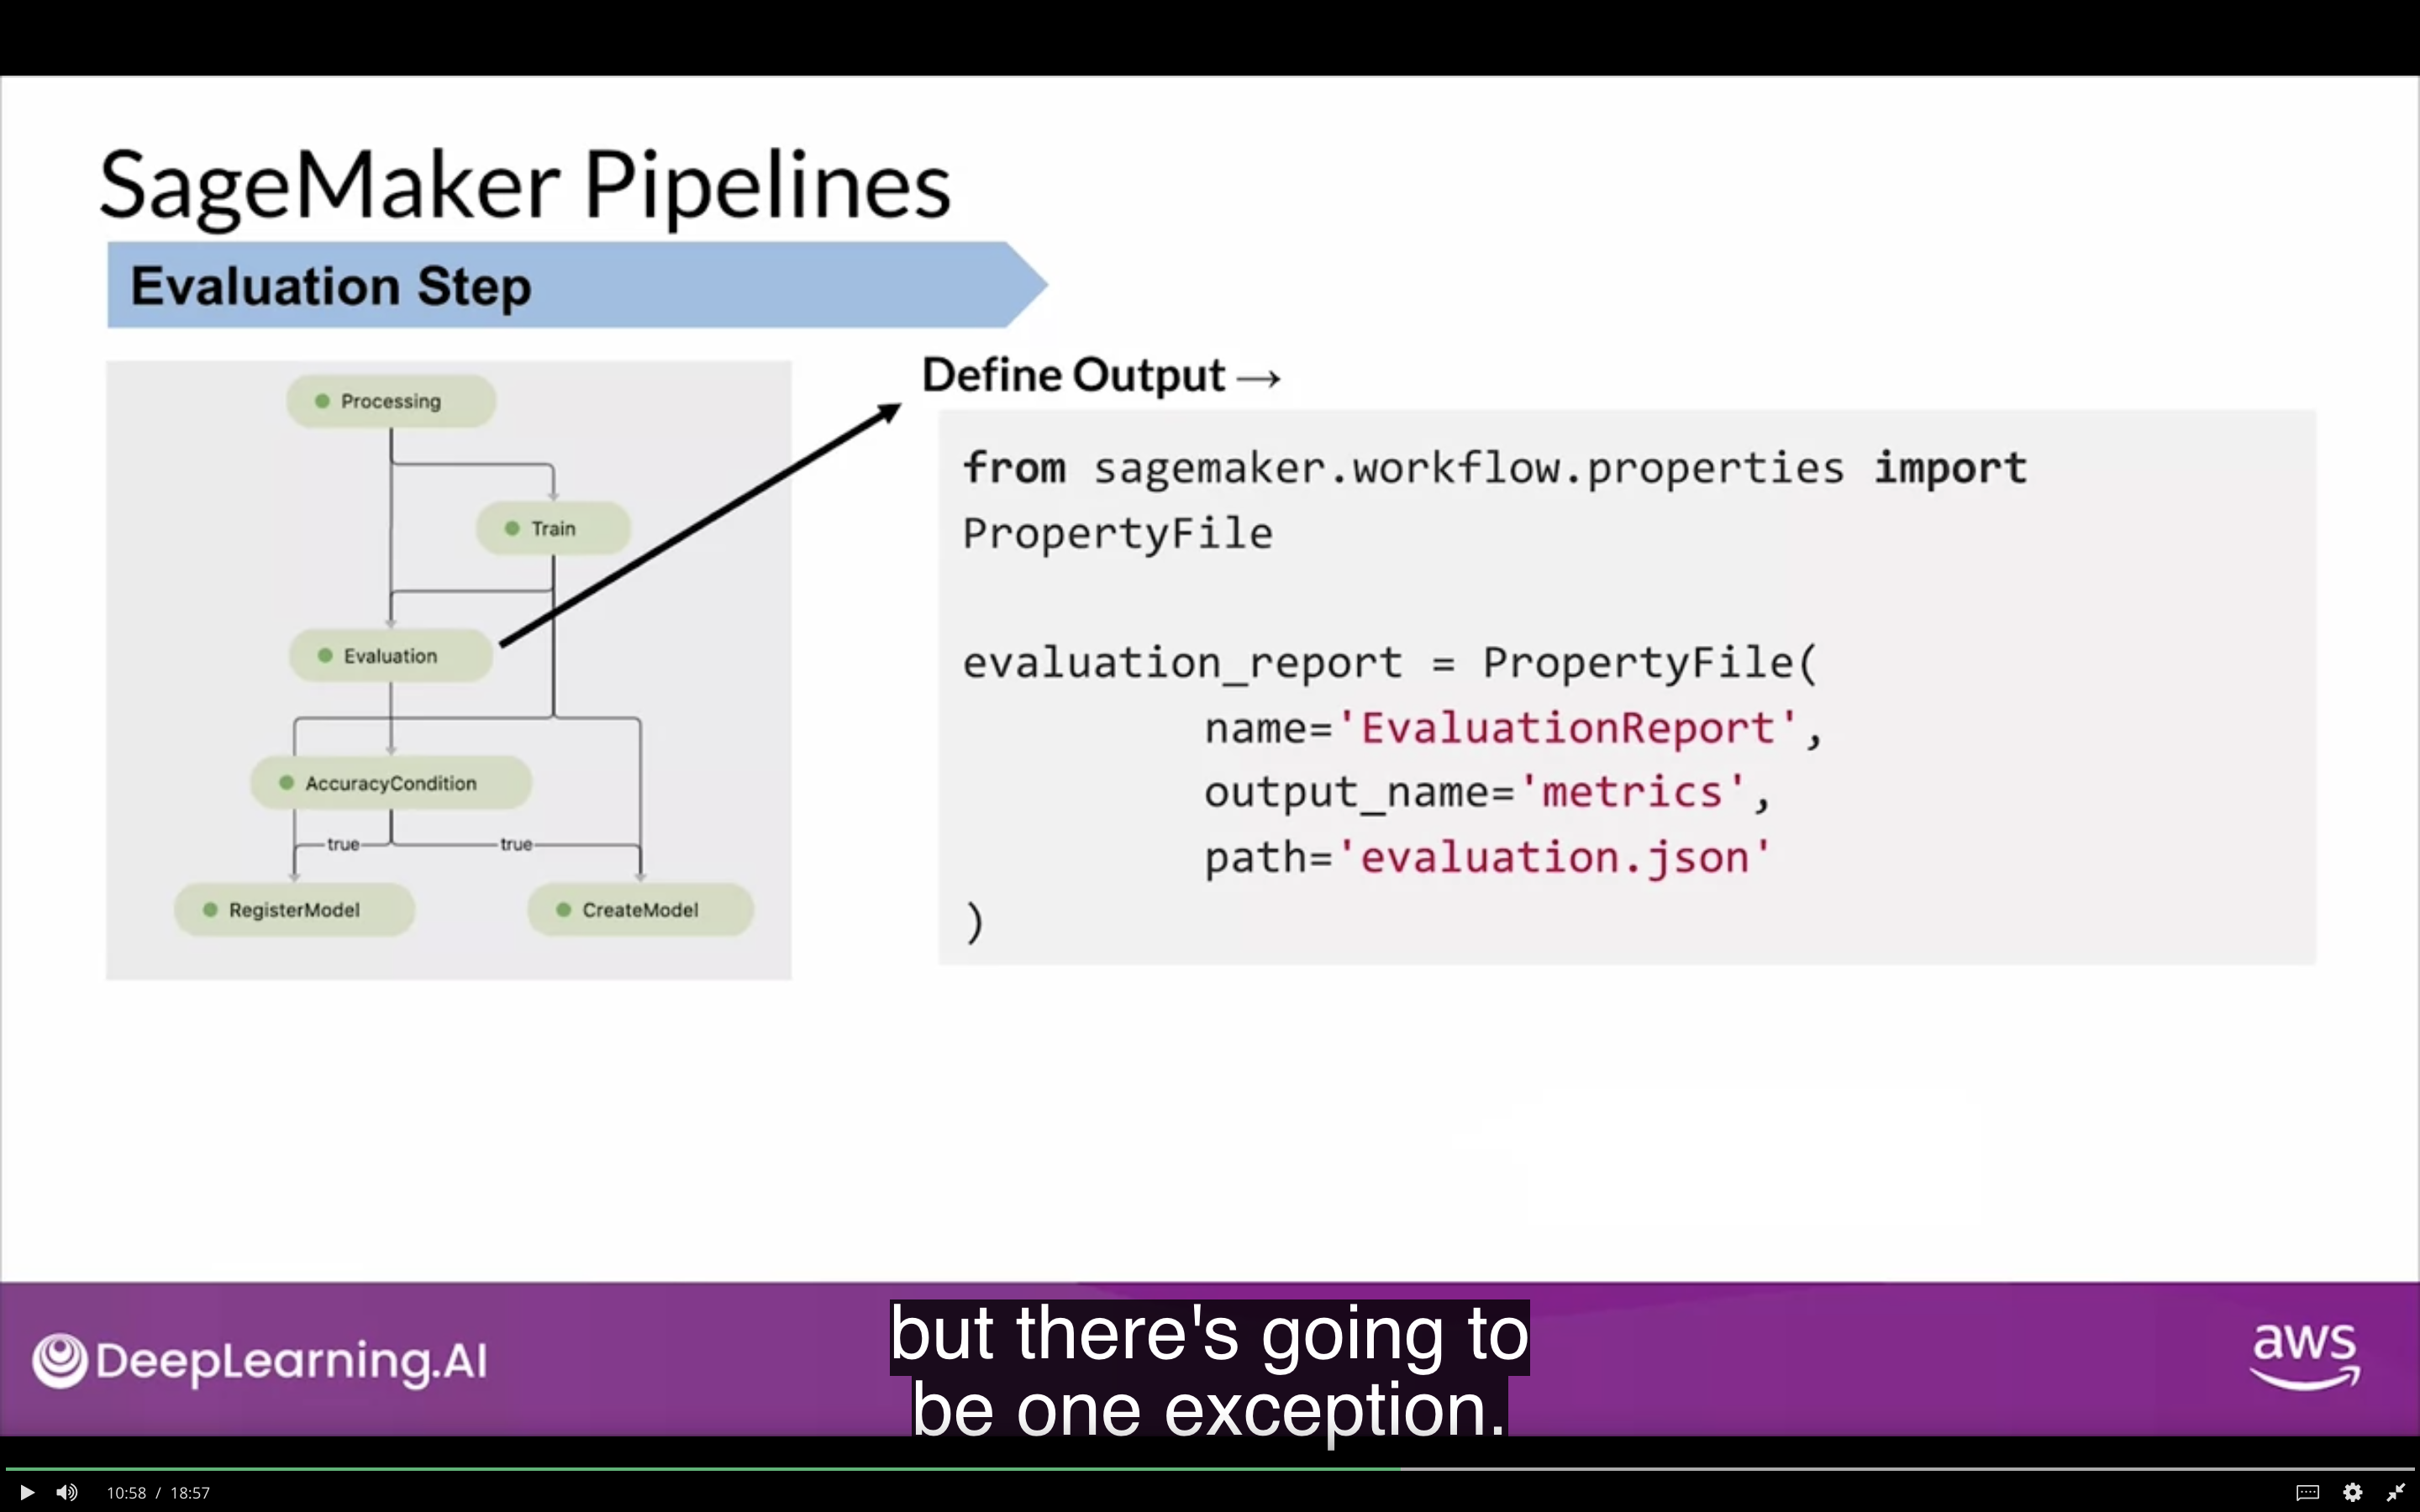

 you've established the minimum accuracy value which you have previously assigned, and then after you configure this condition, you now need to configure that step. Again, to configure the step, you're going to use a built-in conditional step, or you're referring back to the condition that you configured, which in this case, is minimum accuracy. You're using this to determine if model accuracy is above that specified threshold. If it is, then you're going to proceed into the model register and create model steps inside your pipeline as you can see here in the if_steps. If the accuracy is below that threshold, you'll mark that pipeline as fail. Now that I've covered the pipeline steps that are used for your data and your model building or training tasks, I'll now cover the last two steps in your pipeline, which are registering the model and creating the model package that can then be used for deployment. If you recall, one of the key components of SageMaker Pipelines is SageMaker model registry. It's very difficult to manage machine learning models at scale without a model registry. It's often one of the first conversations that I have with teams that are looking to scale and manage their machine learning workloads more effectively. There are different tools and different ways to implement a model registry, which is why covered the concept of model registry in an earlier section. But in this particular section, I'm going to look specifically at SageMaker model registry and incorporating it as a step inside our pipeline. SageMaker model registry contains a central catalog of models with their corresponding metadata. It also contains the ability to manage their approval status of a workflow by either marking a model as approved or rejected. Let's say the model accuracy is still lower than required for production deployment. As a machine learning engineer, you may want to mark that model as rejected so it's not a candidate for deployment to a higher-level environment. You could also use the model registry as a trigger for downstream deployment pipeline so that when you approve a model, it then automatically kicks off a deployment pipeline to deploy your model to downstream environments. But now let's go back to your pipeline and look at how you can set up and configure the last two steps of your pipeline. When you register your model, you want to indicate which serving image should be used when you decide to deploy that model. This ensures that not only do you know how the model was trained through the metadata that you capture in the model registry, but you also know how you can host that same model because you've defined the image to use for inference. You also need to define your model metrics where you're essentially pulling data that already exists about your model, but ensuring that it's stored as metadata into that central model registry. Finally, you configure the actual step inside SageMaker Pipelines using the built-in function called Register Model. In your configuration, you can see that you include the container image that should be used for inference, the location of your model artifact in S3, the target configuration for the compute resources that you would use for deployment of the model, as well as some metrics that are very specific to this model version. All of this metadata will be used to populate the model registry. You can see here that when you register the model, the approval status is also a configuration parameter that you can optional use to set the approval status for the model when you register it. The default is to set the approval status to pending manual approval, which is more in line with the continuous delivery strategy versus the continuous deployment strategy because you're indicating that you still want a human to approve that model manually before you start any downstream deployment activities. I just walked through each of these steps and I explained the configuration of each step, but how do you link all these steps together? Once you have all these steps configured within your pipeline, you now need to link them together to create an end-to-end machine learning pipeline. To link all of these steps together, you need to configure the pipeline using the pipeline function that's part of the SDK. You can see in this example that you're specifying several parameters as input across all of the steps in your pipeline. You also define the steps that you configured previously. Now that you've configured all those different steps and you've configured the pipeline itself, you want to be able to take this instantiation of a pipeline and actually run it. To actually run the pipeline, you'll use the Python SDK to start that pipeline. You're going to provide the input that corresponds to the first step in your pipeline. In this case, your first step is the data processing step. When you start running your pipeline, you need to specify your raw dataset as input and the S3 location of that raw dataset. Then when you start your pipeline, you can then visualize the status of each of your steps through SageMaker Studio or you can describe the status of your steps using the Python SDK. I just walked through the core components of pipelines and I primarily focused on SageMaker Pipelines and SageMaker Model Registry. I also explained how you configure each step inside your pipeline, as well as how you instantiate and run your pipeline. Once you have your pipelines set up, you can now make changes to the code in the configuration and quickly iterate across your experiments using your automated machine learning pipeline. In the next section, I'll cover the third component, which is SageMaker Projects. Projects allows you to automatically incorporate CI/CD practices such as source control and setting up automated workflows to automatically initiate downstream deployment processes based on an approved model in your model registry. This is not covered in the lab specifically, but it's included to show you how you can continuously improve and evolve your machine learning pipelines with new capabilities. 

![](2024-01-01-02-58-57.png)

![](2024-01-01-02-59-44.png)

![](2024-01-01-03-00-02.png)

![](2024-01-01-03-00-34.png)

![](2024-01-01-03-00-52.png)

![](2024-01-01-03-01-09.png)

![](2024-01-01-03-01-34.png)

![](2024-01-01-03-01-55.png)

![](2024-01-01-03-02-35.png)

![](2024-01-01-03-03-00.png)

![](2024-01-01-03-03-36.png)

![](2024-01-01-03-04-25.png)

![](2024-01-01-03-04-59.png)

### **Machine Learning Pipelines with Amazon SageMaker Projects**

![](2023-12-31-21-47-11.png)

Typically when you talk about creating machine learning pipelines, you focus first on automation including quality gates, tracking model lineage and some of the key artifacts that are produced as part of that pipeline. Incorporating additional CI/CD practices becomes more of an advanced topic. We're choosing not to dive too deep into that particular aspect in this particular session, because it's important to first understand the components of a machine learning pipeline. Including how to automate the steps in your workflow, as well as how to orchestrate those steps. You can then continue to evolve and improve your pipelines by incorporating CI/CD practices. SageMaker projects gives you a lot of those capabilities with preconfigured MLOps templates. So in this section I'm going to cover SageMaker projects. if you recall, SageMaker projects integrates directly with SageMaker pipelines and SageMaker model registry. And it's used to create MLOps solutions to orchestrate and manage your end to end machine learning pipelines, while also incorporating CI/CD practices. With projects you can create end to end machine learning pipelines that incorporate CI/CD practices like source and version control, as well as the ability to trigger downstream deployments off of an approved model in the model registry. Projects have built in MLOps templates that provision and pre configure the underlying resources that are needed to build end to end CI/CD pipelines. These pipelines include things like source control for your model build and deployment code, automatic integration with SageMaker model registry, as well as approval workflows to start downstream deployments to other environments. You can use these built-in project templates or you can also create your own project templates. Next, I'll do a quick demo of projects so that you can learn how it builds on SageMaker pipelines and SageMaker model registry, to add advanced machine learning pipeline capabilities. 

![](2023-12-31-21-48-07.png)

### **Amazon SageMaker Projects Demo**

For input, I'll just need to provide a name and optionally a description and tags that I want to associate with my project. Then I'll click Create Project. It will take a few minutes for your project to create because it's provisioning and configuring a lot of resources, as well as automatically setting up the integrations that will be used in your end-to-end pipeline. While it's creating, you'll see the status of creating over on the left-hand side here. Once your project is created, you'll see the status changed to create it. You'll also see the resources created that are included in your project. First, you'll see that the project includes the automatic creation of two source code repositories. One for your model-building tasks, which includes your training code, as well as the Python code that creates an automated model-building pipeline using SageMaker pipeline. The other repository is for your model deployment tasks and includes codes such as your AWS CloudFormation templates that are used for automatically creating SageMaker hosted end points. In this first view, you can clone the AWS code commit Source Repositories to your studio environment by clicking Clone repo. After you clone the repo, you can then modify and iterate on the code in your studio environment and then commit changes back to your source code repository. The built-in projects include seed code to get you started. That code should be modified to your own use case. Let's look at the pipeline that gets set up inside SageMaker pipelines using the seed coat. As you can see, we have one pipeline setup. This pipeline was generated by the seed coat and an execution of this pipeline is already in progress. It was already started when I initiated the creation of the project.

![](2023-12-31-21-49-54.png)

![](2023-12-31-21-50-24.png)

![](2023-12-31-21-50-46.png)

![](2023-12-31-21-51-21.png)

![](2023-12-31-21-51-55.png)

![](2023-12-31-21-52-20.png)

![](2023-12-31-21-52-44.png)

![](2023-12-31-21-53-55.png)

![](2023-12-31-21-54-15.png)

![](2023-12-31-21-54-43.png)

![](2023-12-31-21-54-57.png)

![](2023-12-31-21-55-35.png)

![](2023-12-31-21-55-53.png)

![](2023-12-31-21-56-26.png)

![](2023-12-31-21-56-43.png)

![](2023-12-31-21-57-06.png)

![](2023-12-31-21-57-25.png)

 Let's wait for a moment while this pipeline completes execution. I pause the demo for a few minutes while the pipeline completed to be able to show you the other components that are automatically included in your SageMaker project. In this pipeline, you can see the final steps of doing model evaluation and then registering the model to the SageMaker Model Registry. I'm now going to navigate to the model registry that is automatically set up inside my project by going back to my Project tab and then clicking on model groups. Sagemaker Model Registry includes model groups which are groupings of models. As you can see, there is one model package group in the Registry. I'll go ahead and click on that one. You'll see that the model version that was registered as part of our pipeline step. You can see here that the stage is set to none because this model version has not yet been deployed to an environment. You'll also see that the approval status is currently set to pending. Let's go ahead and take a look at the model metrics associated with this registered model by clicking on the model, and then going over to metric. Let's assume that these metrics are acceptable for us in our use case. Let's go ahead and approve the model for deployment by clicking update status. I'm going to go ahead and indicate that the model is approved. You can also specify notes in here as well. I'm going to go ahead and hit Update Status. Now that the model is deployed, this then initiates a deployment pipeline that is automatically set up when we created our initial project. It's going to initiate that deployment pipeline which uses AWS code pipeline in a combination with the model deploy code in that second code commit repository that I looked at. It's going to then deploy the model to a staging and production endpoint. This process can take a few minutes, but once again, I can go back to my project and under endpoints I have visibility into the status of the endpoint that's being created. In this case, the endpoint is still being created for staging. I'll check back in in a few minutes once it's completed. You can now see my staging endpoint is in-service, meaning it's available for serving prediction requests. You would also see a production endpoint here as your model version is approved after validation and staging. In this demo, I showed you how you can automatically set up your end-to-end machine learning pipelines to incorporate a CICD practices by using Amazon SageMaker Projects. 

![](2023-12-31-21-58-16.png)

![](2023-12-31-21-58-31.png)

![](2023-12-31-21-58-52.png)

![](2023-12-31-21-59-22.png)

![](2023-12-31-21-59-37.png)

![](2023-12-31-22-01-26.png)

![](2023-12-31-22-00-35.png)

![](2023-12-31-22-01-02.png)